In [1]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import torch
x = np.load('Base/Res Base/x.npy')
y = np.load('Base/Res Base/y.npy')
x_test = np.load('Base/Res Base/X_test.npy')
y_test = np.load('Base/Res Base/y_test.npy')

In [3]:
import torch
# Usamos cuda
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
X=[]
Y=[]
for i in range(x.shape[0]):
    X.append(torch.from_numpy(x[i]).float())
    Y.append(torch.from_numpy(y[i]).float())

In [5]:
X_test=[]
Y_test=[]
for i in range(x_test.shape[0]):
    X_test.append(torch.from_numpy(x_test[i]).float())
    Y_test.append(torch.from_numpy(y_test[i]).float())

In [6]:
from torch.utils.data import Dataset

class TrainDataset(Dataset):
    def __init__(self):
        self.samples = X
        self.labels = Y

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx], self.labels[idx]
    
class TestDataset(Dataset):
    def __init__(self):
        self.samples = X_test
        self.labels = Y_test

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx], self.labels[idx]

In [7]:
Traindata = TrainDataset()
Testdata = TestDataset()

In [8]:
batch_size = 500
train_loader = torch.utils.data.DataLoader(dataset=Traindata, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=Testdata, batch_size=batch_size, shuffle=True)

In [4]:
import torch.nn as nn

In [5]:
class create_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(252, 500)
        self.BatN1   = nn.BatchNorm1d(500)
        self.linear2 = nn.Linear(500, 250)
        self.BatN2   = nn.BatchNorm1d(250)
        self.linear3 = nn.Linear(250, 88)
        self.Drop   = nn.Dropout(0.3)
        self.ReLU   = nn.ReLU()
        self.Sig     = nn.Sigmoid()
        
        
    def forward(self, x): 
        x = self.linear1(x)
        x = self.ReLU(x)
        x = self.Drop(x)
        x = self.BatN1(x)
        x = self.linear2(x)
        x = self.ReLU(x)
        x = self.Drop(x)
        x = self.BatN2(x)
        x = self.linear3(x)
        x = self.Sig(x)
        return x

In [55]:
def TrainModel(model, loss_fn, optimizer, train_loader, val_loader, epochs=10):
    best_valid_loss = float('inf')
    Tl=[]
    Vl=[]
    Va=[]
    for i in range(1, epochs+1):
        losses = []
        for X, Y in tqdm(train_loader):
            X = X.to(device)
            Y = Y.to(device)
            Y_preds = model(X)
            loss = loss_fn(Y_preds, Y)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(i)
        print("Train Loss : {:.3f}".format(torch.tensor(losses).mean()))
        Tl.append(torch.tensor(losses).mean())
        vl = CalcValLossAndAccuracy(model, loss_fn, val_loader)
        if vl< best_valid_loss:
            best_valid_loss = vl
            torch.save(model.state_dict(), './best-val-Model.pt')
        Vl.append(vl)
    plt.plot(Tl, label = "Loss Entrenamiento")
    plt.plot(Vl, label= "Loss Validacion")
    plt.legend()
    plt.show()

In [12]:
#Calcular perdida y accuracy de test
def CalcValLossAndAccuracy(model, loss_fn, val_loader):
    with torch.no_grad():
        Y_shuffled, Y_preds, losses = [],[],[]
        for X, Y in tqdm(val_loader):
            X = X.to(device)
            Y = Y.to(device)
            preds = model(X)
            loss = loss_fn(preds, Y)
            losses.append(loss.item())

            Y_shuffled.append(Y)
            Y_preds.append(preds.argmax(dim=-1))
        print("Valid Loss : {:.3f}".format(torch.tensor(losses).mean()))
        return(torch.tensor(losses).mean())

In [13]:
import torch.optim as optim
import statistics 
from torch.optim import Adam

  0%|          | 0/3287 [00:00<?, ?it/s]

1
Train Loss : 0.666


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.582


  0%|          | 0/3287 [00:00<?, ?it/s]

2
Train Loss : 0.448


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.349


  0%|          | 0/3287 [00:00<?, ?it/s]

3
Train Loss : 0.236


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.223


  0%|          | 0/3287 [00:00<?, ?it/s]

4
Train Loss : 0.138


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.189


  0%|          | 0/3287 [00:00<?, ?it/s]

5
Train Loss : 0.106


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.181


  0%|          | 0/3287 [00:00<?, ?it/s]

6
Train Loss : 0.093


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.174


  0%|          | 0/3287 [00:00<?, ?it/s]

7
Train Loss : 0.084


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.170


  0%|          | 0/3287 [00:00<?, ?it/s]

8
Train Loss : 0.077


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.167


  0%|          | 0/3287 [00:00<?, ?it/s]

9
Train Loss : 0.072


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.166


  0%|          | 0/3287 [00:00<?, ?it/s]

10
Train Loss : 0.068


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.165


  0%|          | 0/3287 [00:00<?, ?it/s]

11
Train Loss : 0.064


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.164


  0%|          | 0/3287 [00:00<?, ?it/s]

12
Train Loss : 0.062


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.164


  0%|          | 0/3287 [00:00<?, ?it/s]

13
Train Loss : 0.060


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.163


  0%|          | 0/3287 [00:00<?, ?it/s]

14
Train Loss : 0.058


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.163


  0%|          | 0/3287 [00:00<?, ?it/s]

15
Train Loss : 0.056


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.162


  0%|          | 0/3287 [00:00<?, ?it/s]

16
Train Loss : 0.054


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.162


  0%|          | 0/3287 [00:00<?, ?it/s]

17
Train Loss : 0.053


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.162


  0%|          | 0/3287 [00:00<?, ?it/s]

18
Train Loss : 0.052


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

19
Train Loss : 0.051


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

20
Train Loss : 0.050


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

21
Train Loss : 0.049


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

22
Train Loss : 0.048


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

23
Train Loss : 0.047


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

24
Train Loss : 0.046


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

25
Train Loss : 0.046


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

26
Train Loss : 0.045


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

27
Train Loss : 0.045


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

28
Train Loss : 0.044


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

29
Train Loss : 0.043


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


  0%|          | 0/3287 [00:00<?, ?it/s]

30
Train Loss : 0.043


  0%|          | 0/2682 [00:00<?, ?it/s]

Valid Loss : 0.161


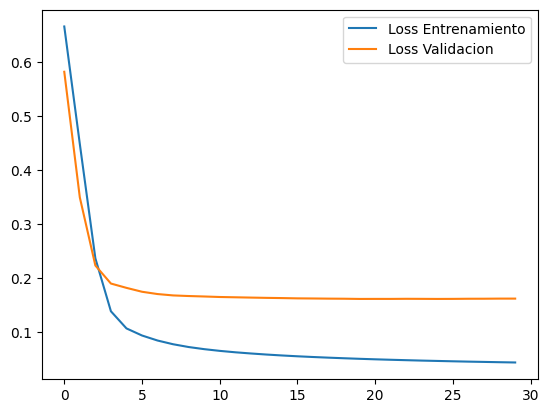

In [56]:
epochs = 30
learning_rate = 1e-5

loss_fn = nn.BCELoss()
classifier = create_model()
classifier.to(device)
optimizer = Adam(classifier.parameters(), lr=learning_rate)

TrainModel(classifier, loss_fn, optimizer, train_loader, test_loader, epochs)

In [6]:
#Se carga el modelo ya entrenado
model = create_model().to('cpu')
model.load_state_dict(torch.load('Base/Res Base/best-val-Model.pt'))
model.eval()

create_model(
  (linear1): Linear(in_features=252, out_features=500, bias=True)
  (BatN1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=500, out_features=250, bias=True)
  (BatN2): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=250, out_features=88, bias=True)
  (Drop): Dropout(p=0.3, inplace=False)
  (ReLU): ReLU()
  (Sig): Sigmoid()
)

In [58]:
X_test_t=torch.from_numpy(x_test).float()
yhat = model(X_test_t)
yhat = yhat.detach().numpy()
Y_pred = 1.0 * ( np.array(yhat) > 0.5)

In [59]:
TP = np.count_nonzero(np.logical_and( Y_pred == 1, y_test == 1 ))
FN = np.count_nonzero(np.logical_and( Y_pred == 0, y_test == 1 ))
FP = np.count_nonzero(np.logical_and( Y_pred == 1, y_test == 0 ))
print (TP, FN, FP)
if (TP + FN) > 0:
    R = TP/float(TP + FN)
    P = TP/float(TP + FP)
    A = TP/float(TP + FP + FN)
    if P == 0 and R == 0:
        F = 0
    else: 
        F = 2*P*R/(P + R)
else: 
    A = 0
    F = 0
    R = 0
    P = 0

print ('\n F-measure pre-processed: ')
print (F)
print ('\n Accuracy pre-processed: ')
print (A)

1381155 4428121 151416

 F-measure pre-processed: 
0.3762418366931373

 Accuracy pre-processed: 
0.23171051280623123


In [7]:
MusP = np.load('Base/Res Base/MusP.npy')
#Se introduce la melodía al modelo
MusP=torch.from_numpy(MusP).float()
yhat = model(MusP)

In [8]:
yhat = yhat.detach().numpy()

In [9]:
Y_pred = 1.0 * ( np.array(yhat) > 0.5)

In [63]:
np.save('Base/Res Base/y_hat.npy', Y_pred)

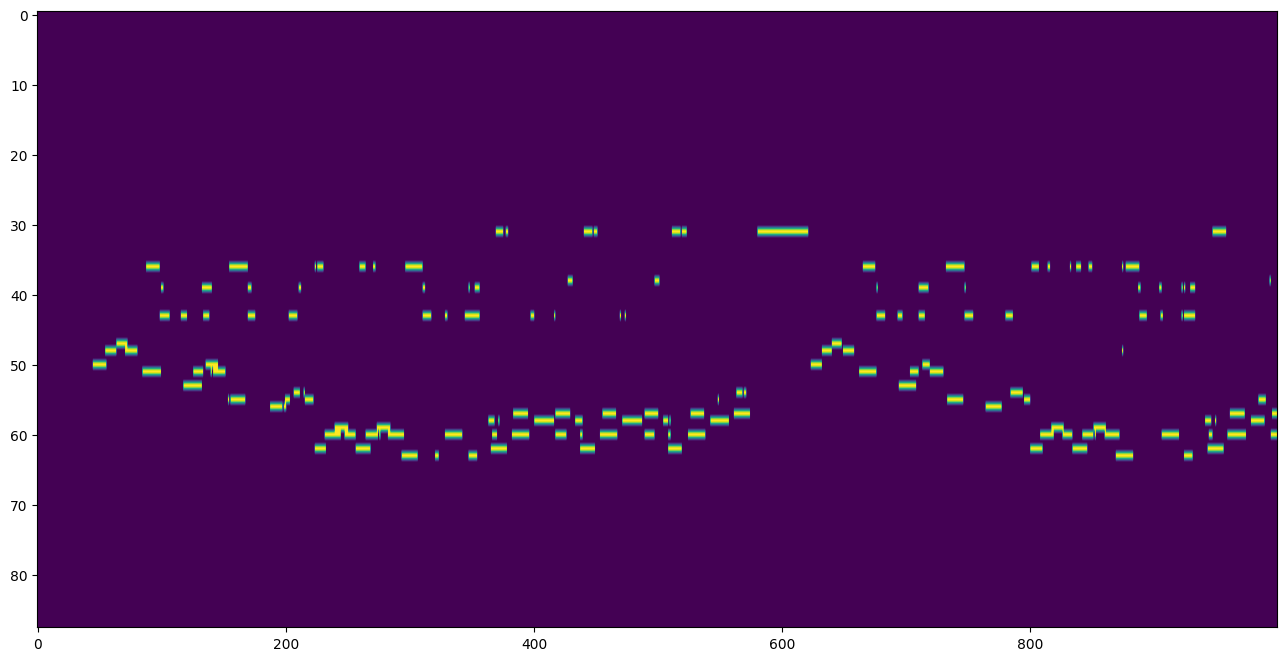

In [12]:
plt.figure(figsize=(16, 8))
plt.imshow(Y_pred[:1000].T, aspect="auto")